In [1]:
import warnings as _wrn
_wrn.filterwarnings('always')

In [2]:
import sys as _sys

import numpy as _nmp
import matplotlib.pyplot as _plt
import pandas as _pnd

%load_ext autoreload
%autoreload 2
%matplotlib inline

_plt.style.use('ggplot')

In [3]:
_sys.path.append('../')
import eQTLseq as _assoc

In [4]:
# load and clean data
data = _pnd.read_table('../data/montpick_count_table_CEU.txt', index_col=0)
data = data[data.sum(1) > 0]

In [39]:
# fit data
counts = data.values / _assoc.calculate_norm_factors(data.values)
res = _assoc.fit_nbinom_model(counts, normalised=True)

Fitting gene 12612 of 12613


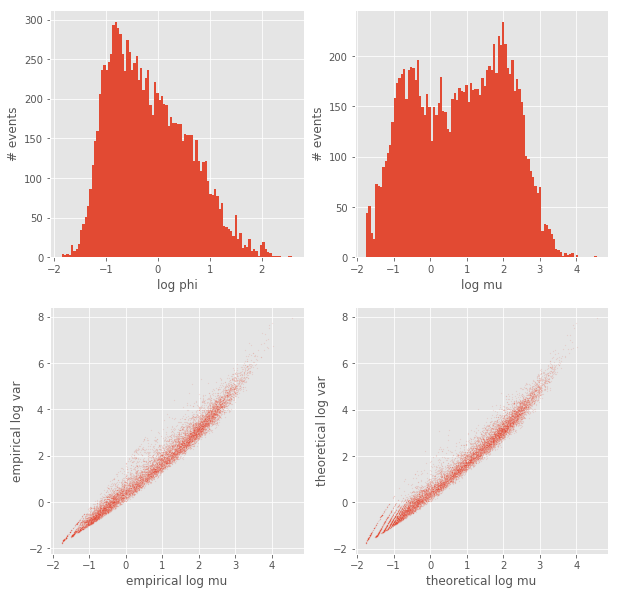

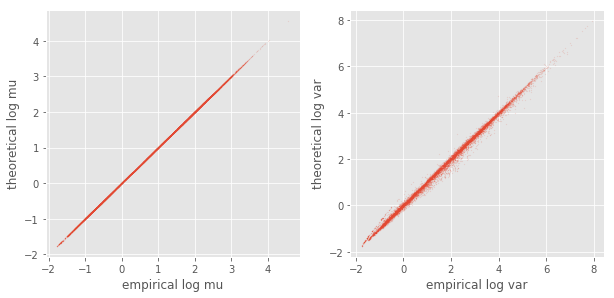

In [52]:
# clean data
mu = res['mu'][res['converged']]
phi = res['phi'][res['converged']]
cnts = counts[res['converged']]

idxs = phi > 1e-3
phi = phi[idxs]
mu = mu[idxs]
cnts = cnts[idxs]

# empirical mean and variance
mean = cnts.mean(1)
var = cnts.var(1)

# plot
_plt.figure(figsize=(10,10))
_plt.subplot(2,2,1); _plt.hist(_nmp.log10(phi), 100); _plt.xlabel('log phi'); _plt.ylabel('# events')
_plt.subplot(2,2,2); _plt.hist(_nmp.log10(mu), 100); _plt.xlabel('log mu'); _plt.ylabel('# events')

_plt.subplot(2,2,3); _plt.plot(_nmp.log10(mean), _nmp.log10(var), '.', markersize = 0.1); _plt.xlabel('empirical log mu'); _plt.ylabel('empirical log var')
_plt.subplot(2,2,4); _plt.plot(_nmp.log10(mu), _nmp.log10(mu + phi * mu**2), '.', markersize = 0.1); _plt.xlabel('theoretical log mu'); _plt.ylabel('theoretical log var')

_plt.figure(figsize=(10,10))
_plt.subplot(2,2,1); _plt.plot(_nmp.log10(mean), _nmp.log10(mu), '.', markersize = 0.1); _plt.xlabel('empirical log mu'); _plt.ylabel('theoretical log mu') 
_plt.subplot(2,2,2); _plt.plot(_nmp.log10(var), _nmp.log10(mu + phi * mu**2), '.', markersize = 0.1); _plt.xlabel('empirical log var'); _plt.ylabel('theoretical log var');

In [58]:
_pnd.DataFrame({'MeanObs': mean, 'VarObs': var, 'MeanEst': mu, 'VarEst': mu + phi * mu**2}).to_csv('../data/pars2.txt', index = False)